# Analysis on Curators with all metrics

In [2]:
import json 
import pandas as pd

with open("data_stories_summary.json", "r", encoding="utf-8") as f:
    data = json.load(f)

curators_per_story = []

for story_id, story in data.items():
    curators = story.get("curators")
    curators_per_story.append({
        "story_id": story_id,
        "n_curators": curators
    })
df_curators = pd.DataFrame(curators_per_story)
df_curators.to_csv("outputs/curators.csv")

print(df_curators)

    story_id  n_curators
0   D-hp3wDV           2
1   y4Srva15           2
2   7qpfziir           2
3   Nokx0yU6           2
4   gz_gxhYn           2
5   U2OtB3XT           2
6   v4h_GSI0           1
7   1ptR3pru           3
8   JQpdcw-d           2
9   B9SLlUry           3
10  r7i-PG2n           3
11  AUmcnOzL           2
12  tyK82z37           1
13  IRRbkmZk           2
14  Vy4_Rxzv           3
15  M9EZmoBI           2
16  uhDaBOl1           1
17  SXefpzf4           1
18  EzsIH_Et           1
19  16FP4tfG           1
20  sUMoEZI5           2
21  _HnVHPjm           1
22  4D206Lam           2
23  j3ZikN40           2
24  BOGODrvZ           3
25  abkhtH-r           2
26  Huo1mZpJ           4
27  JYOzBt8Y           2
28  buiNjeJj           2
29  PziKYGG_           4
30  wa1_2kB_           2
31  lkuzAhad           2
32  jamFJtUo           2
33  gzeEqkGo           3
34  KzqVF2Z6           2
35  Ww1HhAGH           3
36  IuSofTQ_           3
37  TQjKggI7           3
38  Jzaeaf75           3


In [20]:
# Total number of stories
print("\nTotal number of stories:", len(df_curators))

# Count of stories by number of curators
print("\nDistribution (value counts):")
print(df_curators["n_curators"].value_counts().sort_index())

# Minimum and maximum
print("\nMinimum number of curators:", df_curators["n_curators"].min())
print("Maximum number of curators:", df_curators["n_curators"].max())

# Average
print("Average number of curators:", df_curators["n_curators"].mean())


Total number of stories: 51

Distribution (value counts):
n_curators
1    10
2    28
3    11
4     2
Name: count, dtype: int64

Minimum number of curators: 1
Maximum number of curators: 4
Average number of curators: 2.0980392156862746


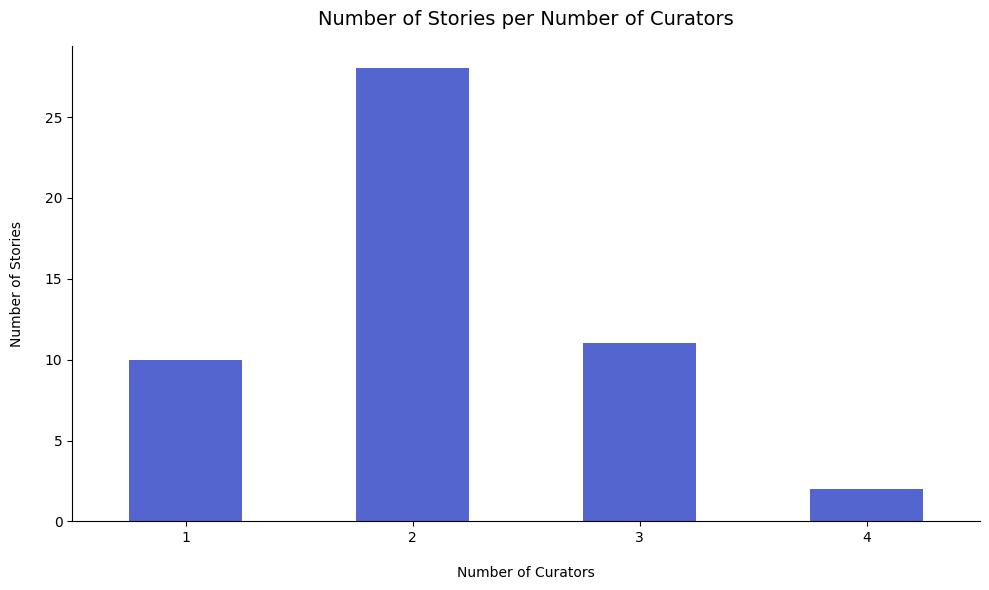

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

color_palette = ['#5565cf', '#b14ecf', '#cf4773', '#cf913f', '#87cf38', '#30cf6b', '#29a1cf', '#2138cf']

df_curators = pd.read_csv('outputs/curators.csv', index_col=0)

# how many stories have each number of curators
curator_distribution = df_curators['n_curators'].value_counts().sort_index()

plt.figure(figsize=(10,6))
curator_distribution.plot(kind='bar', color=color_palette[0])
plt.title('Number of Stories per Number of Curators', fontsize=14, pad=15)
plt.xlabel('Number of Curators', labelpad=15)
plt.ylabel('Number of Stories', labelpad=15)
plt.xticks(rotation=0)
plt.tight_layout()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Save as JPG with 300 dpi and EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/23.jpg", dpi=300, bbox_inches="tight", format="jpg")
# plt.savefig("outputs/img/23.eps", format="eps", bbox_inches="tight")
plt.show()


In [3]:
color_palette = ['#5565cf', '#b14ecf', '#cf4773', '#cf913f', '#87cf38', '#30cf6b', '#29a1cf', '#2138cf']

df_curators = pd.read_csv('outputs/curators.csv', index_col=0)
df_density = pd.read_csv('outputs/information_density_scores.csv', index_col=0)
df_sparql = pd.read_csv('outputs/sparql_proficiency_final.csv', index_col=0)
df_alternation = pd.read_csv('outputs/alternation_scores.csv', index_col=0)
df_coherence = pd.read_csv('outputs/coherence_scores.csv', index_col=0)
df_readability = pd.read_csv('outputs/readability_scores.csv', index_col=0)
df_data_viz = pd.read_csv('outputs/data_viz_num.csv', index_col=0)

df_temp = pd.merge(df_curators[['story_id', 'n_curators']],
                   df_sparql[['story_id', 'sparql_proficiency']],
                   on='story_id', how='inner')

df_temp = pd.merge(df_temp,
                   df_coherence[['story_id', 'coherence_score']],
                   on='story_id', how='inner')

df_temp = pd.merge(df_temp,
                   df_alternation[['story_id', 'alternation_score']],
                   on='story_id', how='inner')

df_temp = pd.merge(df_temp,
                   df_density[['story_id', 'information_density']],
                   on='story_id', how='inner')

df_temp = pd.merge(df_temp,
                   df_readability[['story_id', 'flesch_reading_ease']],
                   on='story_id', how='inner')

df_temp = pd.merge(df_temp,
                   df_data_viz[['story_id', 'num_data_viz']],
                   on='story_id', how='inner')

df_combined = df_temp.copy()

# Filter out stories with no text
story_no_text = ['SXefpzf4', 'EzsIH_Et', '6yGct8pP']
df_filtered = df_combined[~df_combined['story_id'].isin(story_no_text)]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

def plot_relationship(x_data, y_data, x_label, y_label, color1, color2, img_num):
    x = np.array(x_data)
    y = np.array(y_data)
    
    # Compute best-fit line (linear regression)
    m, b = np.polyfit(x, y, 1)  # 1st-degree polynomial (y = mx + b)
    
    # Create scatter plot
    plt.scatter(x, y, color=color1, label="Data points")
    
    # Plot best-fit line
    x_sorted = np.sort(x)
    plt.plot(x_sorted, m*x_sorted + b, color=color2, linewidth=1, label="Best-fit line")
    
    # Labels and title
    plt.xlabel(x_label, labelpad=10)
    plt.ylabel(y_label, labelpad=10)
    plt.grid(True, which='major', axis='both')
    plt.xticks(np.arange(min(x), max(x)+1))
    # Save as JPG with 300 dpi and EPS (vector format, resolution-independent)
    plt.savefig(f"outputs/img/{img_num}.jpg", dpi=300, bbox_inches="tight", format="jpg")
    plt.savefig(f"outputs/img/{img_num}.eps", format="eps", bbox_inches="tight")
    plt.show()

    # Pearson correlation (measures linear relationship)
    pearson_corr, pearson_p = pearsonr(x, y)

    # Spearman correlation (measures monotonic relationship, rank-based)
    spearman_corr, spearman_p = spearmanr(x, y)

    # Print results
    print(f"Pearson correlation: {pearson_corr:.3f} (p-value: {pearson_p:.3f})")
    print(f"Spearman correlation: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

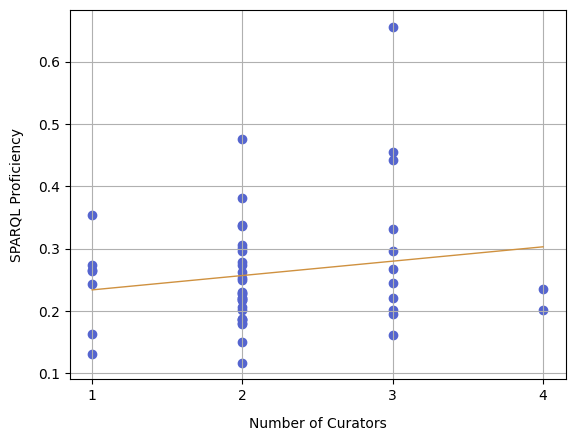

Pearson correlation: 0.171 (p-value: 0.246)
Spearman correlation: 0.091 (p-value: 0.538)


In [7]:
plot_relationship(df_filtered["n_curators"], df_filtered["sparql_proficiency"], "Number of Curators", "SPARQL Proficiency", color_palette[0], color_palette[3], '24')

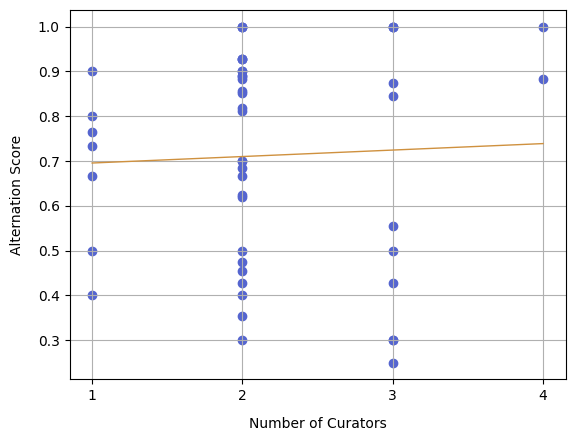

Pearson correlation: 0.045 (p-value: 0.763)
Spearman correlation: 0.067 (p-value: 0.651)


In [8]:
plot_relationship(df_filtered["n_curators"], df_filtered["alternation_score"], "Number of Curators", "Alternation Score", color_palette[0], color_palette[3], '25')

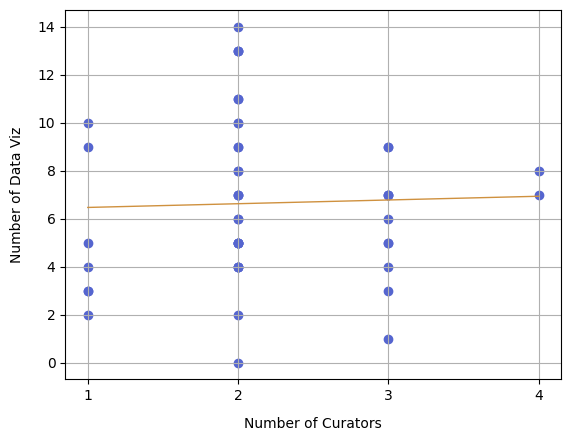

Pearson correlation: 0.034 (p-value: 0.817)
Spearman correlation: 0.062 (p-value: 0.675)


In [9]:
plot_relationship(df_filtered["n_curators"], df_filtered["num_data_viz"], "Number of Curators", "Number of Data Viz", color_palette[0], color_palette[3], '26')

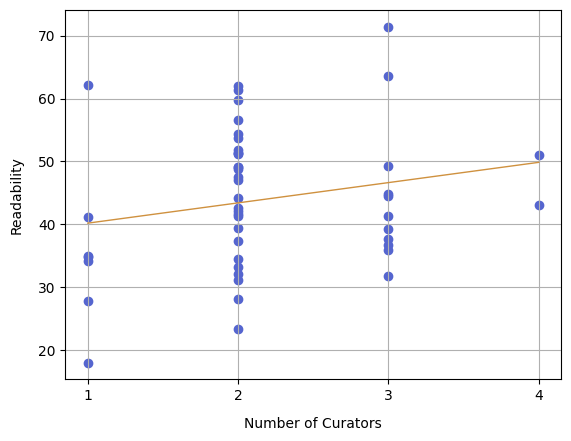

Pearson correlation: 0.208 (p-value: 0.156)
Spearman correlation: 0.190 (p-value: 0.197)


In [10]:
plot_relationship(df_filtered["n_curators"], df_filtered["flesch_reading_ease"], "Number of Curators", "Readability", color_palette[0], color_palette[3], '27')

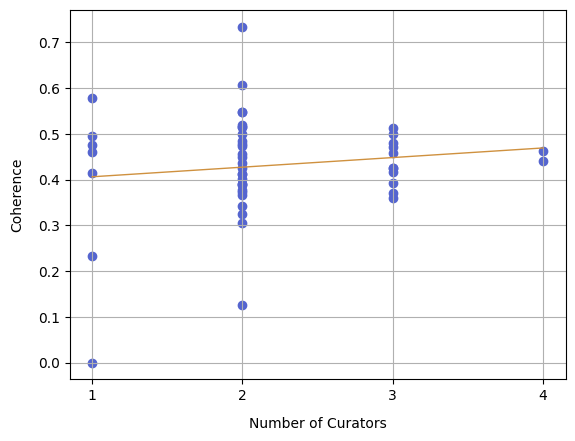

Pearson correlation: 0.133 (p-value: 0.366)
Spearman correlation: 0.021 (p-value: 0.889)


In [11]:
plot_relationship(df_filtered["n_curators"], df_filtered["coherence_score"], "Number of Curators", "Coherence", color_palette[0], color_palette[3], '28')

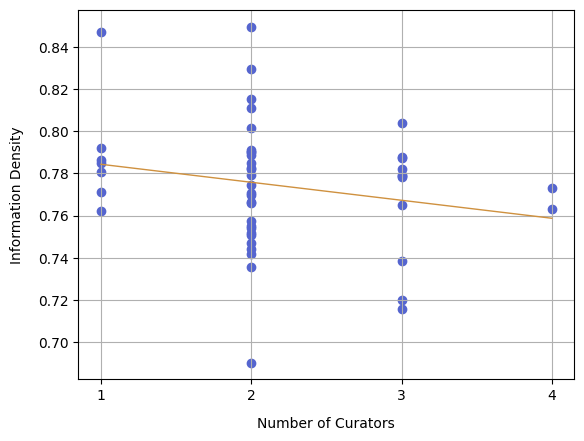

Pearson correlation: -0.205 (p-value: 0.162)
Spearman correlation: -0.194 (p-value: 0.187)


In [12]:
plot_relationship(df_filtered["n_curators"], df_filtered["information_density"], "Number of Curators", "Information Density", color_palette[0], color_palette[3], '29')